# arXiv Monthly Downloads

### Caveats
Here are some caveats to consider, taken from the [arXiv website](https://arxiv.org).
> _While we have attempted to extract download data representing unique full-text downloads by real users, there are many factors which affect accuracy. These factors include:_
    >>1. _the data is from the main [arXiv site](https://arxiv.org) and the arXiv mirrors, though some mirror data is incomplete;_
    >>2. _only web downloads are included (and not FTP or email "downloads" that were formerly supported);_
    >>3. _we have counted downloads according to the COUNTER algorithm which excludes rapid repeat downloads;_
    >>4. _we have attempted to identify and remove robot or automated downloads from the count (false positives lead to undercounting, failing to identify robots leads to overcounting);_
    >>5. _data prior to 2009 has not been cleaned with as much care as later data, it shows trends nonetheless._

In [1]:
# Imports
from warnings import filterwarnings
filterwarnings('ignore')

# The usual suspects ...
import time_series as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

# And their accomplices ...
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

# Plotting settings
sns.set(context='notebook', style='whitegrid', palette='deep', rc=None)

In [2]:
# Data
downloads = pd.read_csv('get_monthly_downloads_extracted_09-08-2018.csv')

In [3]:
# Changing data types
ts.convert_to_datetime(data=downloads, column='month')

In [4]:
# Creating time-series object
downloads = ts.create_series(data=downloads, time_column='month', category_column='downloads')

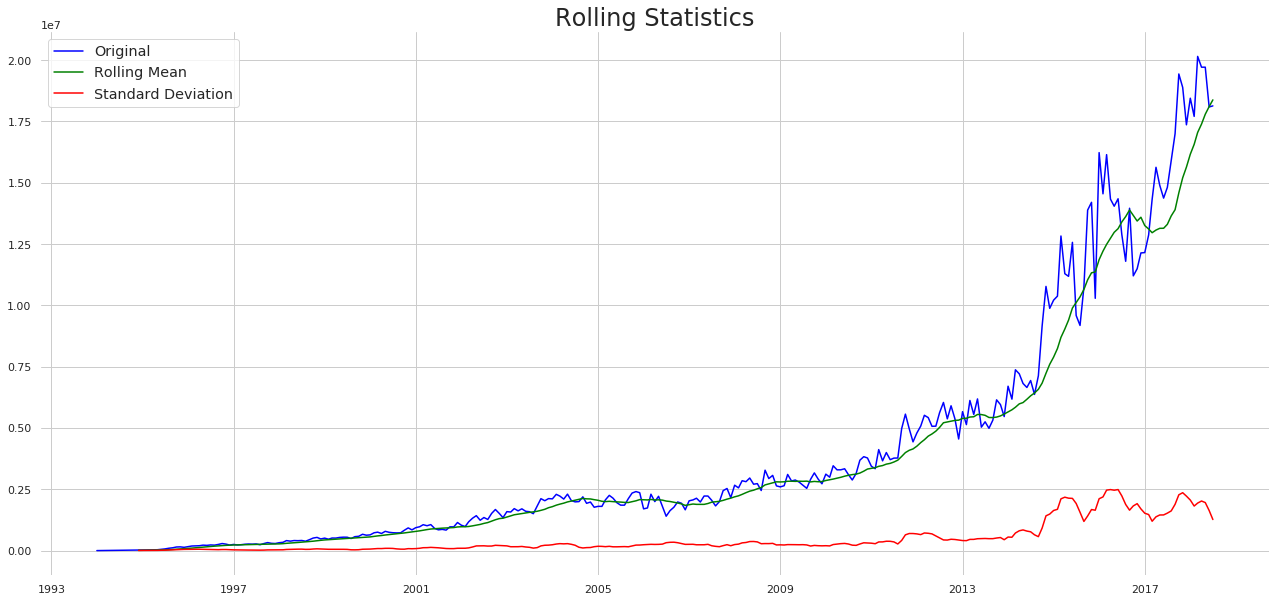

Results of Dickey-Fuller Test:
Test Statistic                   4.223103
p-value                          1.000000
Number of Lags Used             10.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64


In [5]:
# Testing stationarity
ts.test_stationarity(downloads)

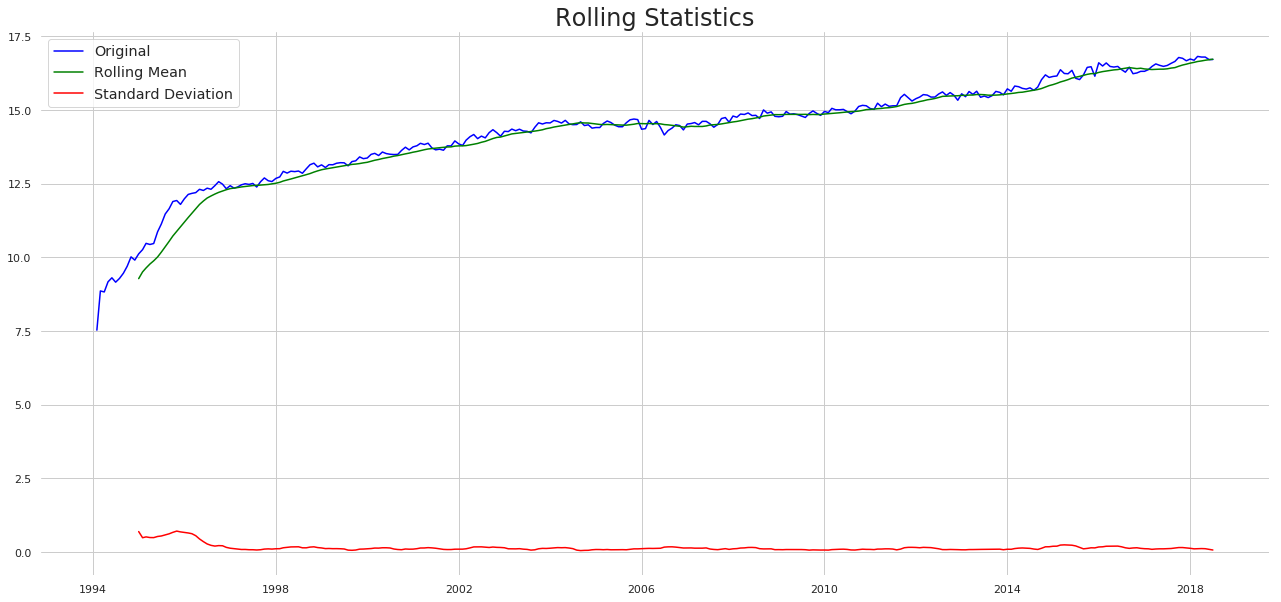

Results of Dickey-Fuller Test:
Test Statistic                  -2.012030
p-value                          0.281323
Number of Lags Used             12.000000
Number of Observations Used    281.000000
Critical Value (1%)             -3.453838
Critical Value (5%)             -2.871881
Critical Value (10%)            -2.572280
dtype: float64


In [6]:
# Reducing trend
downloads_log = np.log(downloads)
downloads_log.replace([np.inf, np.negative(np.inf)], np.nan, inplace=True)
downloads_log.dropna(inplace=True)

# Testing stationarity
ts.test_stationarity(downloads_log)

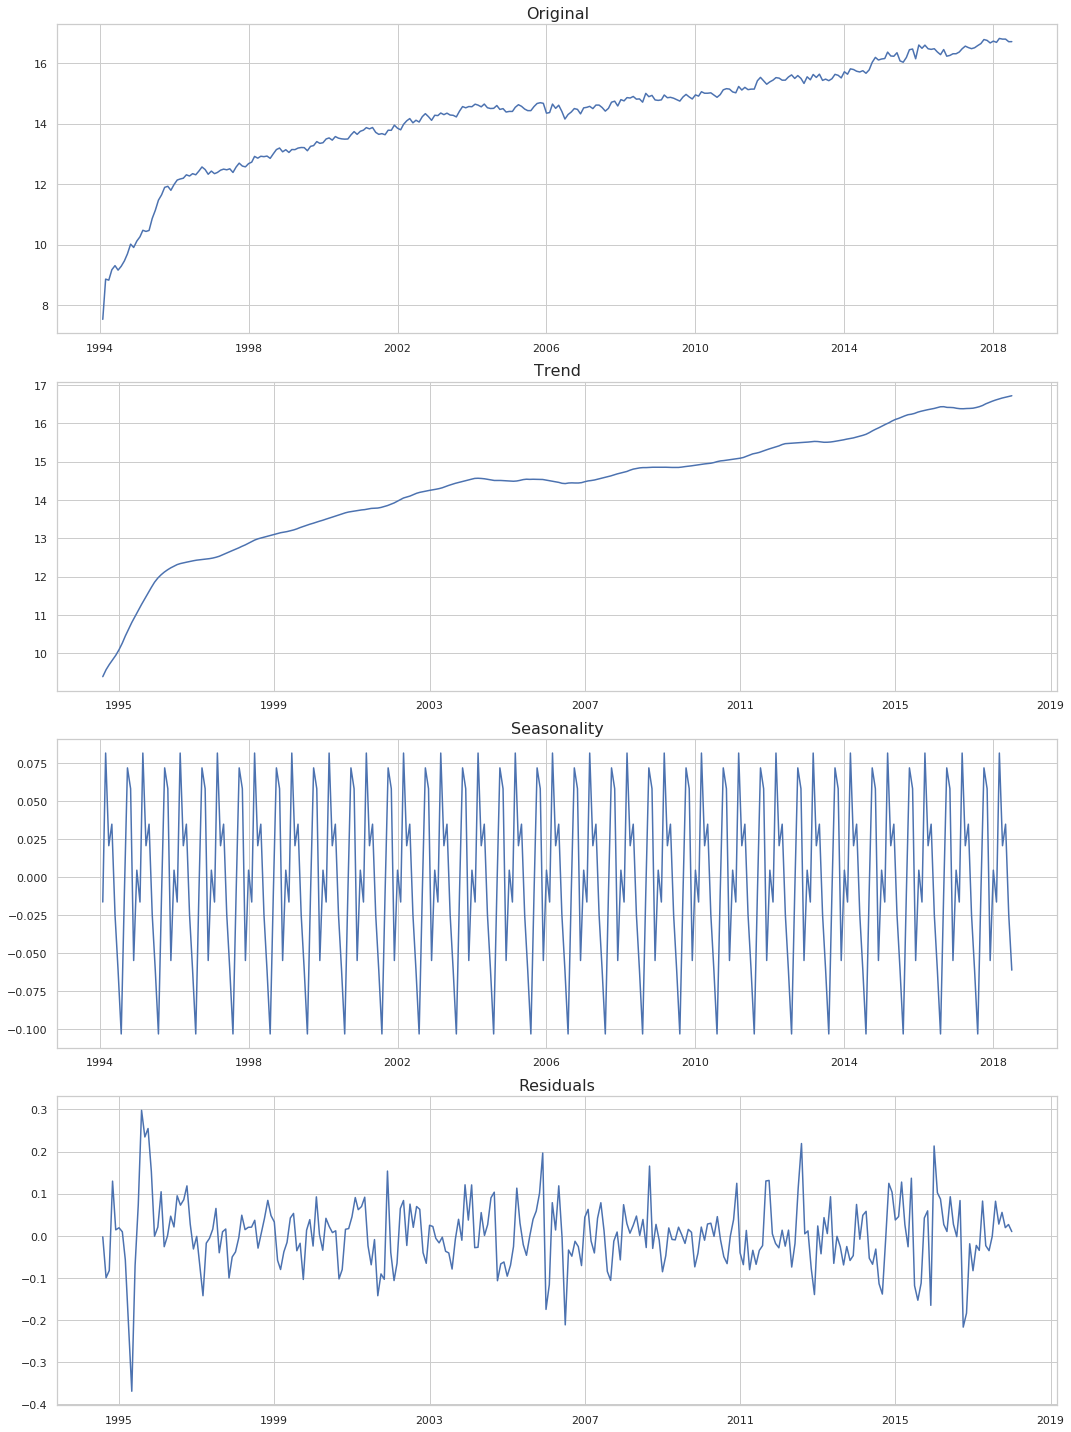

In [20]:
decomposed(downloads_log)